### Imports

In [3]:
import tensorflow as tf
from tensorflow import keras

#Helper libiraries
import numpy as np
import matplotlib.pyplot as plt

### Dataset
##### We would be using the MNIST Fashion Dataset. This is a dataset that is included in keras.
##### This dataset includes 60,000 images for training and 10,000 images for validating/testing

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### let's have some exploratory data analysis to see what we are working with

In [5]:
print(train_images.shape)
print(type(train_images))

(60000, 28, 28)
<class 'numpy.ndarray'>


#### So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [6]:
train_images[0, 23, 23] # let's have a look at one pixel

194

#### Our pixels vvalues are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [7]:
train_labels[:10] # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

### Our labels are integers ranging from 0-9. Ech integer represents a specific article of clothing. We'll create an array of label to indicate which is which

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Finally let's look at what some of these images look like

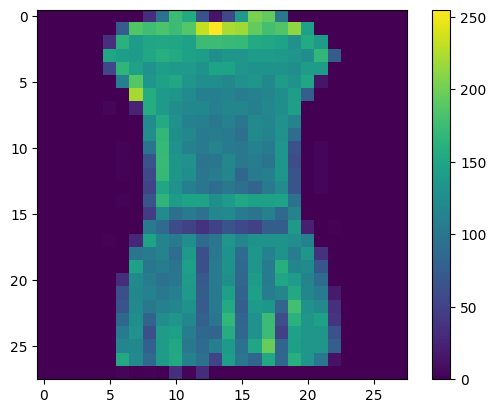

In [9]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing
##### The last step before creating our model is to preprocess our data. In this case, we would simply scale all of our greyscale pixel values (0-255) to be btw 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller vals will make it easier for our model to process our vals.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model
#### We are going to use a keras sequential model with 3 different layers, it is the basic form of neural network. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer 1
    keras.layers.Dense(128, activation='relu'), # hidden layer (2), relu is rectify linear unit
    # dense means all of the neurons in the previous layers are connected to every neuron in this layer
    keras.layers.Dense(10, activation='softmax') # output layer (3)
    ])
    # we have 10 output neurons in our output layers because we have 10 class names


### Compiling the Model
#### Hyper Parameter Tuning
##### The last step in building the model is to define the loss function, opt9mizer and metrics we would like to track.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# The optimized adam is the algorithm that performs the gradient descent
# sparse categorical crossentropy is our loss function
# our metrics, the output we want to see should be based on accuracy

### Training the Model

In [13]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4994 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3773 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3373 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3142 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2975 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2494 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

### Evaluating the Model
##### The verbose argument is defined from the keras documentation as: 'verbose: 0 or 1. Verbosity mode 0 = silent, 1 = progress bar' of how much information is printed out to the console

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8857
Test accuracy: 0.885699987411499


##### We can notice that our test accuracy is lower than our train accuracy, we can try and change our epochs values to both lower and higher values and see how it can influence it.

In [15]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2323 - accuracy: 0.9133


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8862
Test accuracy: 0.8862000107765198


##### And we can see that less epochs gave us more accuracy on our test data

### Make Predictions
##### making predictions using the .predict method of our model with our test dataset

In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
test_images.shape

(10000, 28, 28)

##### From the shape, we can see it is an array of 10000 images. So, If we just wanted to predict on one image, we can simply say [test_images[0]] because it is used to seeing data in array forms

In [19]:
print(predictions)

[[1.3791248e-09 3.4026415e-09 1.0747767e-09 ... 1.9707175e-03
  4.2395392e-08 9.9695164e-01]
 [6.2131199e-05 4.3070369e-12 9.9889219e-01 ... 1.9111791e-18
  2.1059752e-09 1.1704144e-15]
 [8.7646281e-09 9.9999994e-01 1.2825977e-12 ... 2.8782662e-26
  1.4715232e-13 1.1377194e-20]
 ...
 [2.0853711e-06 5.2936151e-14 1.2177647e-07 ... 5.7823229e-11
  9.9998933e-01 2.1484581e-11]
 [2.3969142e-09 9.9999923e-01 1.8342119e-10 ... 1.6383354e-14
  2.7217367e-10 9.2787188e-11]
 [5.8218961e-06 1.9479346e-10 1.8750550e-06 ... 5.4654403e-05
  1.2334432e-05 7.5928182e-07]]


In [20]:
print(predictions[0])

[1.3791248e-09 3.4026415e-09 1.0747767e-09 8.9813414e-11 1.5966943e-09
 1.0775557e-03 7.9610473e-08 1.9707175e-03 4.2395392e-08 9.9695164e-01]


##### If we want to find out what class this is predicting for, we hcan use a cool function calld np.argmax which is going to return to us the index of the max val in our predictions list

In [21]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


So, let's try and check if our prediction was any way close

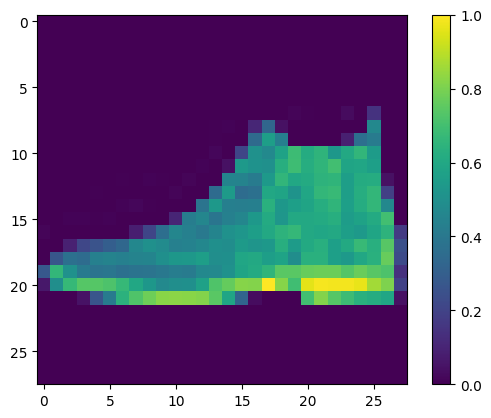

In [22]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Verifying Predictions
##### Some functions which wuld help us verify predictions with some simple visuals

pick a number: 34
1/1 [==============================] - 0s 20ms/step


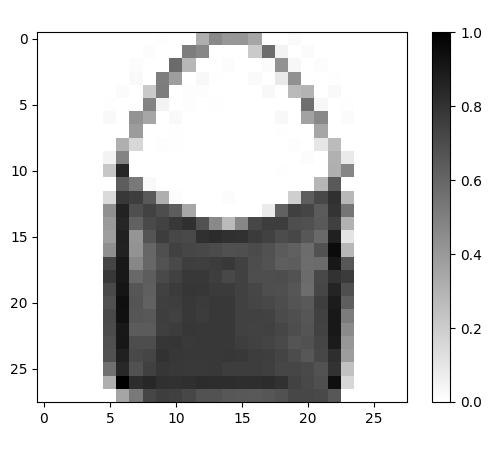

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        return ("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)